**Lab-07 Decision Tree and Random Forest**

#Bài tập

1. Hãy thử thay đổi Max_depth để tăng accuracy trên tập testing, vẽ cây với Max_depth đã thay đổi.
2. max_depth ảnh hưởng như thế nào đối với mô hình decision tree, vì sao?
3. Dùng dataset bên dưới, từ mô hình Decision Tree hãy code thêm mô hình Random Forest như thuật toán đã học. Thử tìm hiểu cách dùng Random Forest trong sklearn để so sánh kết quả.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bt1.csv", header=None)

Đây là data dự đoán một người có bị bênh tiểu đường hay không

In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

In [4]:
# Chia ra tập training và tập testing
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis=1)

y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [5]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/home/minhvu/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


# Câu 1

max_depth = 1
Model accuracy score with criterion gini index: 0.6953
Training-set accuracy score: 0.7027
max_depth = 2
Model accuracy score with criterion gini index: 0.8004
Training-set accuracy score: 0.7666
max_depth = 3
Model accuracy score with criterion gini index: 0.8021
Training-set accuracy score: 0.7865
max_depth = 4
Model accuracy score with criterion gini index: 0.8424
Training-set accuracy score: 0.8341
max_depth = 5
Model accuracy score with criterion gini index: 0.8704
Training-set accuracy score: 0.8634
max_depth = 6
Model accuracy score with criterion gini index: 0.8949
Training-set accuracy score: 0.9067
max_depth = 7
Model accuracy score with criterion gini index: 0.9159
Training-set accuracy score: 0.9378
max_depth = 8
Model accuracy score with criterion gini index: 0.9335
Training-set accuracy score: 0.9594
max_depth = 9
Model accuracy score with criterion gini index: 0.9457
Training-set accuracy score: 0.9749
max_depth = 10
Model accuracy score with criterion gini

Text(0, 0.5, 'training-set accuracy score')

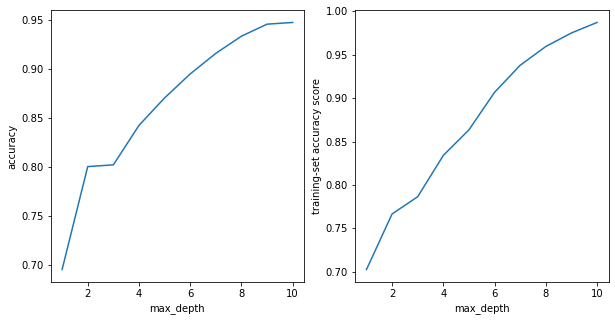

In [6]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

x = []
y = []
z = []
k = 10

for i in range(k):
    
    clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0, max_features=None) 

    # fit the model
    clf_gini.fit(X_train, y_train)
    
    print(f'max_depth = {i+1}')

    accuracy = clf_gini.score(X_test,y_test)
    print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy))
    
    #Check accuracy trên tập training để xem model có bị overfitting hay không
    y_pred_train_gini = clf_gini.predict(X_train)

    print('Training-set accuracy score: {0:0.4f}'. format(clf_gini.score(X_train,y_train)))
    
    x.append(i+1)
    y.append(accuracy)
    z.append(clf_gini.score(X_train,y_train))
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.plot(x,y)
ax1.set_xlabel('max_depth')
ax1.set_ylabel('accuracy')

ax2.plot(x,z)
ax2.set_xlabel('max_depth')
ax2.set_ylabel('training-set accuracy score')

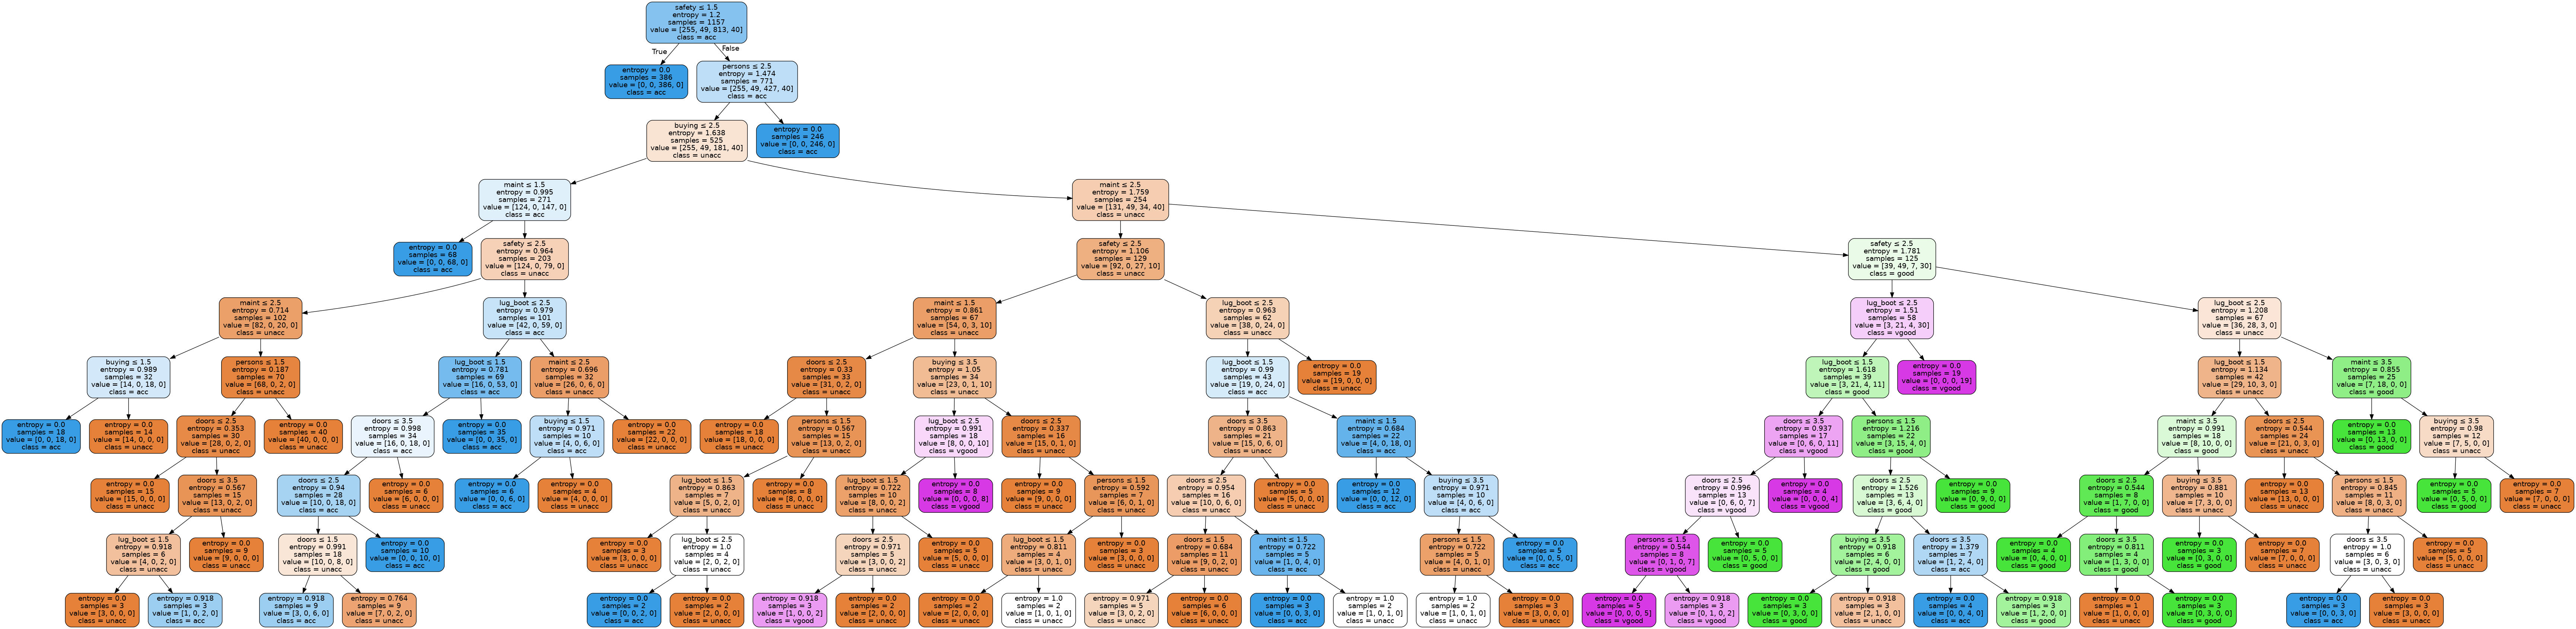

In [7]:
#Vẽ thử cây ra
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_train.columns,class_names=list(y_train.unique()))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bt1.png')
Image(graph.create_png())

# Câu 2
Từ Out[6], ta nhận xét như sau:

1. max_depth = 1, model underfitting
2. max_depth = 2,3,4,5 , model overfitting
3. max_depth = 6,7,8,9,10 , model good

# Câu 3

In [8]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

data=pd.read_csv("bt2.csv", header = 0, names = col_names)

In [9]:
feature_cols = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']

X = data[feature_cols]

y = data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=42)

tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(X_train, y_train)

best_params = tree_cv.best_params_

tree_clf = DecisionTreeClassifier(**best_params)

tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 6320 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 11920 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   44.1s finished


In [11]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(tree_clf, random_state = 1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1420 ± 0.0637,glucose
0.0580 ± 0.0331,bmi
0.0390 ± 0.0226,age
0.0104 ± 0.0161,bp
0.0009 ± 0.0168,pedigree
0 ± 0.0000,insulin
0 ± 0.0000,skin
0 ± 0.0000,pregnant


In [12]:
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7878787878787878


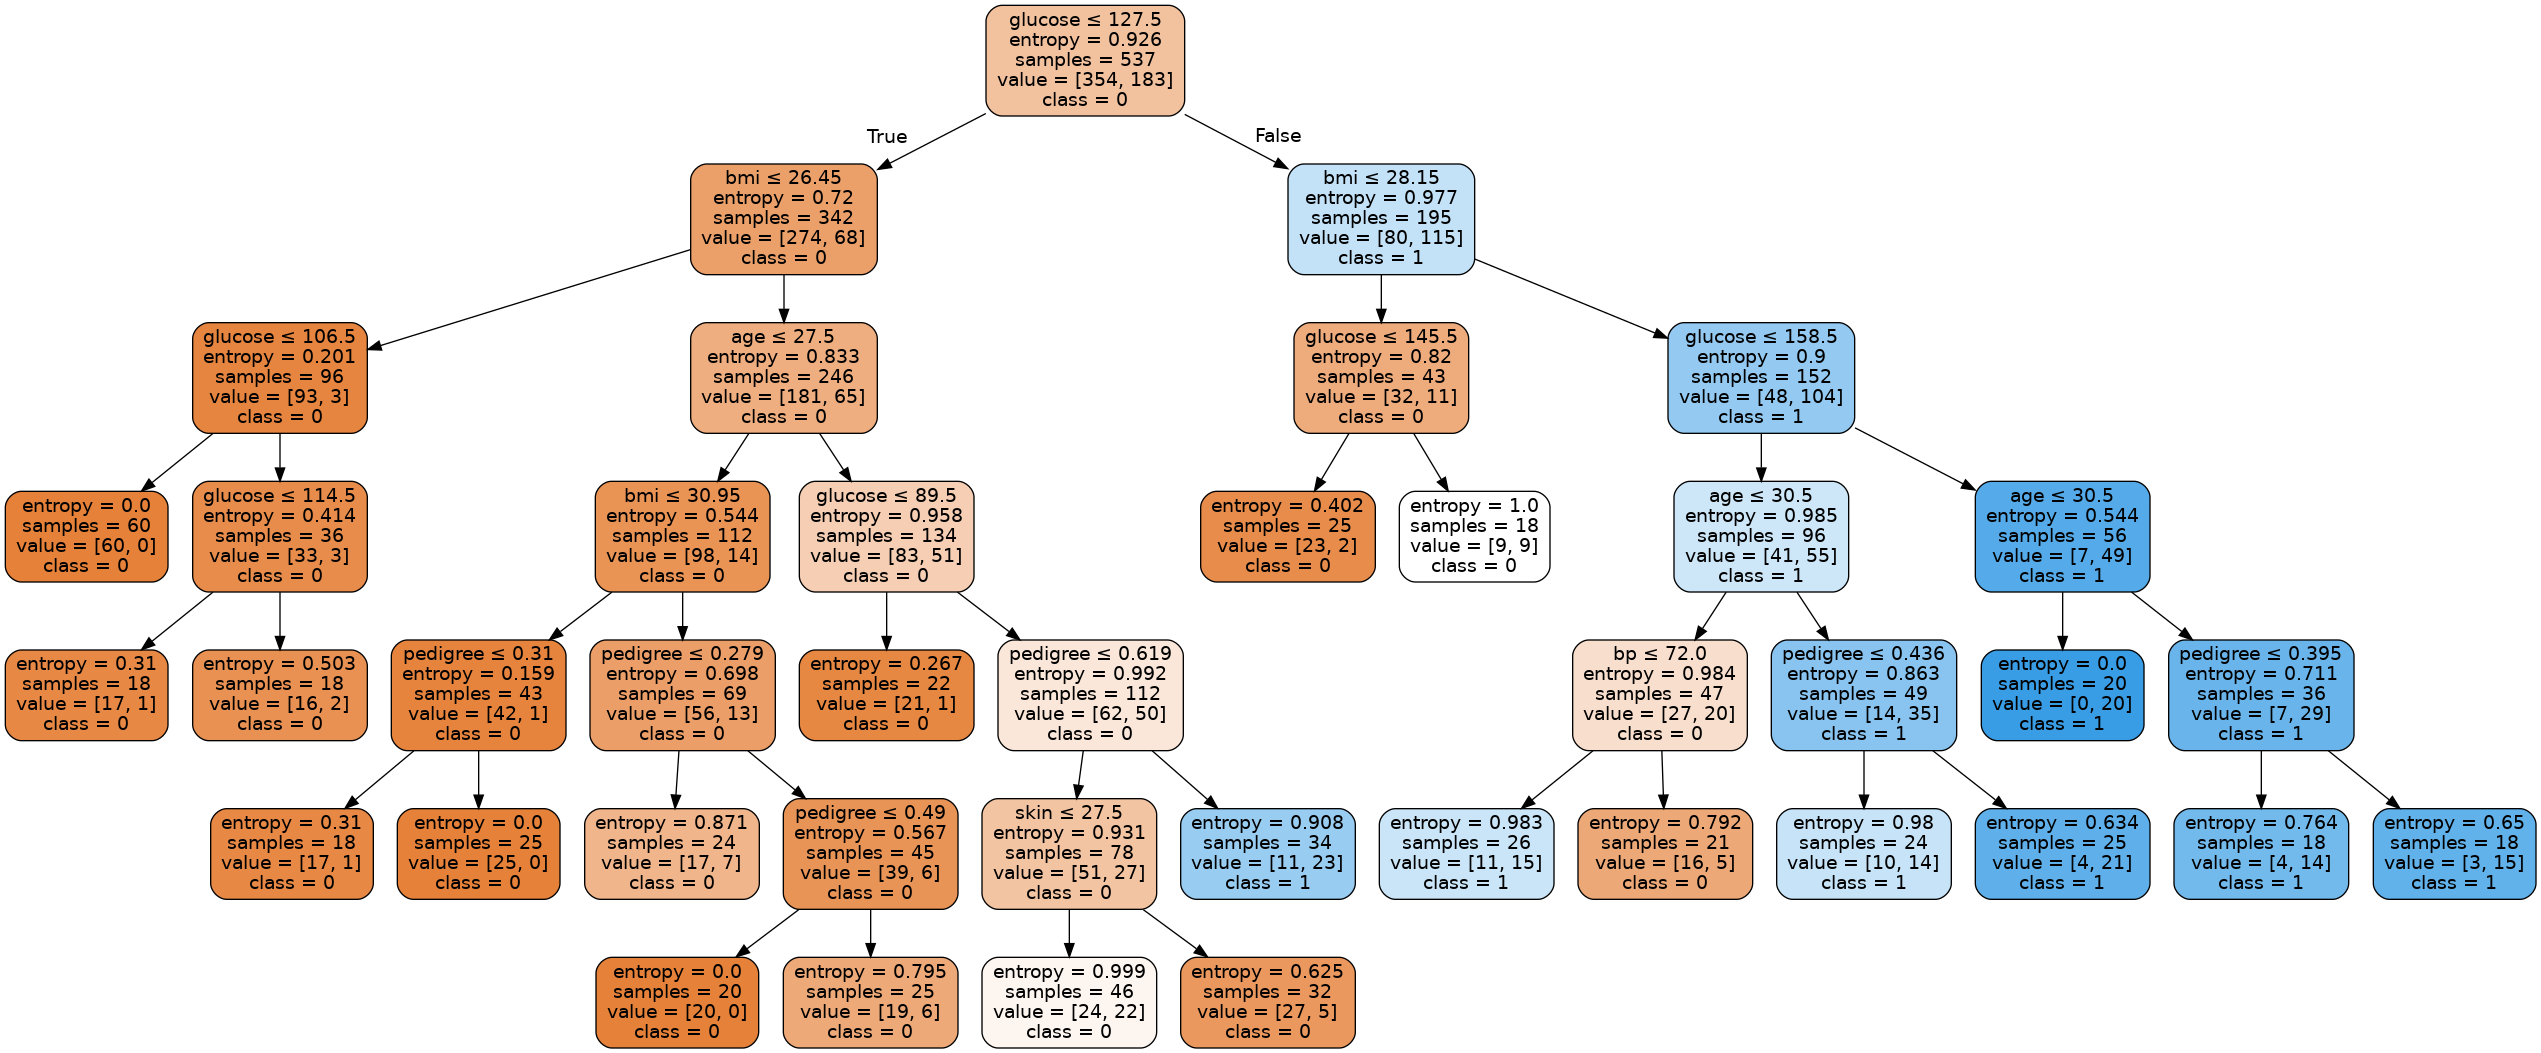

In [13]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [14]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(2)

clf = RandomForestClassifier(n_estimators=50,
                             criterion='gini',
                             max_depth=None,
                            max_features=None,
                            random_state=0)

clf.fit(X_train, y_train)

print("Accuracy on train: ", np.mean(clf.predict(X_train) == y_train))
print("Accuracy on test: ", np.mean(clf.predict(X_test) == y_test))

Accuracy on train:  0.9981378026070763
Accuracy on test:  0.7878787878787878


# MODEL RANDOM FOREST

In [15]:
# 1. Train-Test-Split
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df


# 2. Distinguish categorical and continuous features
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types


# 3. Accuracy
def calculate_accuracy(predictions, labels):
    predictions_correct = predictions == labels
    accuracy = predictions_correct.mean()
    
    return accuracy

In [16]:
# 1.1 Data pure?
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

    
# 1.2 Classify
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification


# 1.3 Potential splits?
def get_potential_splits(data, random_subspace):
    
    potential_splits = {}
    _, n_columns = data.shape
    column_indices = list(range(n_columns - 1))    # excluding the last column which is the label
    
    if random_subspace and random_subspace <= len(column_indices):
        column_indices = random.sample(population=column_indices, k=random_subspace)
    
    for column_index in column_indices:          
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits


# 1.4 Lowest Overall Entropy?
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy


def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy


def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)
            
            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value


# 1.5 Split data
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above


# 2. Decision Tree Algorithm
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5, random_subspace=None):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data, random_subspace)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth, random_subspace)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth, random_subspace)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree


# 3. Make predictions
# 3.1 One example
def predict_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

    
# 3.2 All examples of the test data
def decision_tree_predictions(test_df, tree):
    predictions = test_df.apply(predict_example, args=(tree,), axis=1)
    return predictions


In [17]:
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped

def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    
    return forest

def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    
    return random_forest_predictions

In [19]:
import random
#from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions
#from helper_functions import train_test_split, calculate_accuracy

random.seed(1)
train_data, test_data = train_test_split(data, test_size=0.3)

In [20]:
forest = random_forest_algorithm(train_data, n_trees=10, n_bootstrap=500, n_features=2, dt_max_depth=6)
predictions = random_forest_predictions(test_data, forest)
accuracy = calculate_accuracy(predictions, test_data.label)

print("Accuracy = {}".format(accuracy))

Accuracy = 0.7086956521739131
